In [1]:
import pygraphviz as pgv

from IPython.display import Image

from transition_graph import TransitionGraph

In [2]:
def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

In [13]:
tg = TransitionGraph.from_transition_table(['a', 'b'], {
        'q0': [None, None, ['q1', 'q2']],
        'q1': ['q3', None],
        'q2': ['q4', None],
        'q3': [None, 'q1'],
        'q4': [None, 'q5'],
        'q5': ['q2', None]
    }, start_node='q0', finish_nodes=['q1', 'q2'])

In [10]:
tg.evaluate("abaa")

[False, None, None]

In [16]:
print(tg.to_dot_diagram())

digraph {
    graph [rankdir=LR];
    node [shape=point,label=""]ENTRY;
    node [shape=circle];
    q0[label="q0"];
    q0[label="q0"];
    q1[label="q1"];
    q1[label="q1",peripheries=2];
    q2[label="q2"];
    q2[label="q2",peripheries=2];
    q3[label="q3"];
    q3[label="q3"];
    q4[label="q4"];
    q4[label="q4"];
    q5[label="q5"];
    q5[label="q5"];
    ENTRY->q0;
    q0->q1 [label="λ"];
    q0->q2 [label="λ"];
    q1->q3 [label="a"];
    q2->q4 [label="a"];
    q3->q1 [label="b"];
    q4->q5 [label="b"];
    q5->q2 [label="a"];
}


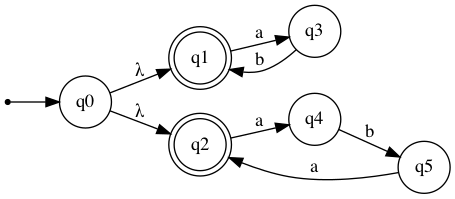

In [14]:
draw(tg.to_dot_diagram())

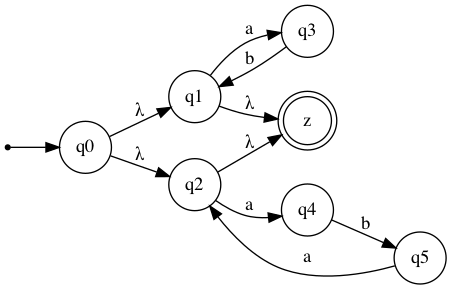

In [5]:
tg1 = tg.eliminate_state()
draw(tg1.to_dot_diagram())

q0 2 0
q1 2 2
q2 2 2
q3 1 1
q1 [<transition_graph.Edge object at 0x10cf53af0>, <transition_graph.Edge object at 0x10cf07ca0>]


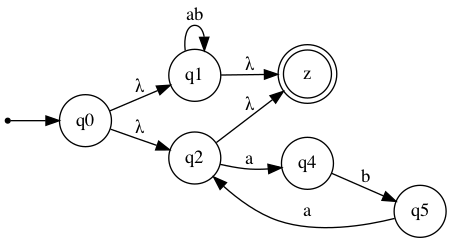

In [6]:
tg2 = tg1.eliminate_state()
draw(tg2.to_dot_diagram())

q0 2 0
q1 1 1
q0 [<transition_graph.Edge object at 0x10cf07d30>, <transition_graph.Edge object at 0x10cf074f0>]


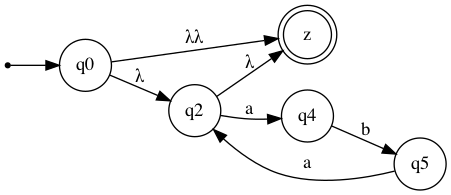

In [7]:
tg3 = tg2.eliminate_state()
draw(tg3.to_dot_diagram())